In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def computeCf(orig_data: np.ndarray, UInf: float):
    Cf = -1.0*np.sign(orig_data[:, 1]) * np.sqrt(orig_data[:, 1]**2 + orig_data[:, 2]**2 + orig_data[:,3]**2) / (0.5 * UInf**2)
    return np.concatenate((orig_data[:, 0].reshape(-1, 1), Cf.reshape(-1, 1)), axis=1)

Text(0, 0.5, '$C_f$')

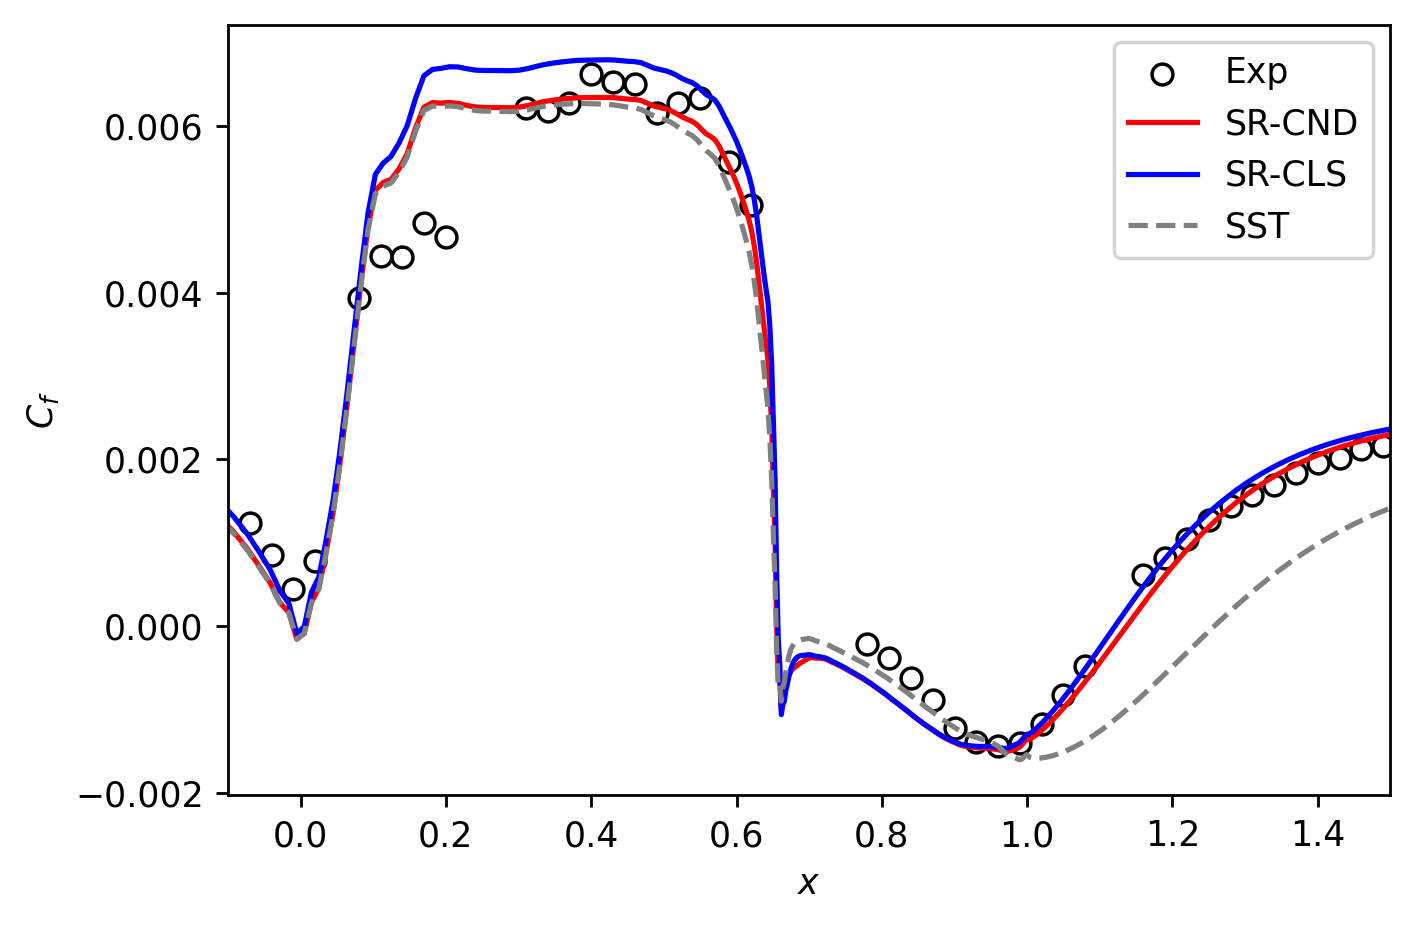

In [20]:
Cf_exp = np.loadtxt("exp.dat", skiprows=5)
Cf_CND = computeCf(np.loadtxt("tauw_SR-shield.dat", skiprows = 1), UInf=14.88)
Cf_CLS = computeCf(np.loadtxt("../hump-SR-test-trad/tauw_SR-trad.dat", skiprows = 1), UInf=14.88)
Cf_SST = computeCf(np.loadtxt("../../baselines/hump-SST/tauw_SST.dat", skiprows = 1), UInf=14.88)

fig = plt.figure(figsize=(6, 4), dpi = 250)
plt.scatter(Cf_exp[::3, 0], Cf_exp[::3, 1], label="Exp", facecolor = "white", edgecolor = "k")
plt.plot(Cf_CND[:, 0], Cf_CND[:, 1], label="SR-CND", c = "r")
plt.plot(Cf_CLS[:, 0], Cf_CLS[:, 1], label="SR-CLS", c = "b")
plt.plot(Cf_SST[:, 0], Cf_SST[:, 1], label="SST", c = "Gray", linestyle = "--")
plt.legend()
plt.xlim(-0.1, 1.5)
plt.xlabel("$x$")
plt.ylabel("$C_f$")